# Creation of recovered data (official)

In [1]:
import matplotlib.pyplot as plt 
%matplotlib inline
import pandas as pd
import numpy as np
from IPython import display

## 1. Creation of the array with the recovered values in time

In [2]:
# Reading file as dictionary
df = pd.read_excel('Germany_JHU_Recovered.xlsx')
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/26/21,7/27/21,7/28/21,7/29/21,7/30/21,7/31/21,2021-01-08 00:00:00,2021-02-08 00:00:00,2021-03-08 00:00:00,2021-04-08 00:00:00
0,NaN,Germany,51.165691,10.451526,0,0,0,0,0,0,...,3645870,3647240,3653990,3649670,3652400,3653150,3654720,3654950,3658150,3659260


In [3]:
# Obtaining the deaths values since the beginning
X_original = df.values[:,4:565]
X_original

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 1, 1, 1, 1, 12, 12, 12, 14, 14, 14, 14, 14, 15, 16, 16, 16,
        16, 16, 16, 16, 16, 17, 18, 18, 18, 18, 25, 25, 46, 46, 46, 67,
        67, 105, 113, 180, 233, 266, 266, 3243, 3547, 5673, 6658, 8481,
        9211, 13500, 16100, 18700, 22440, 24575, 26400, 28700, 28700,
        36081, 46300, 52407, 53913, 57400, 60300, 64300, 68200, 72600,
        77000, 83114, 85400, 88000, 91500, 95200, 99400, 103300, 109800,
        109800, 112000, 114500, 117400, 120400, 123500, 126900, 129000,
        130600, 132700, 135100, 139900, 141700, 141700, 143300, 144400,
        145617, 147200, 148700, 150300, 151597, 152600, 154011, 155041,
        155681, 156966, 158087, 159064, 159716, 160281, 161199, 161967,
        162820, 163360, 164245, 164908, 165352, 165632, 166609, 167453,
        167909, 168480, 168958, 169224, 169556, 170129, 170630, 170961,
        171535, 171970, 172089, 172692, 172842, 173599, 173847, 1

In [4]:
# Transposition of the data

X_trap = np.transpose(X_original)  # Transposition of the data
X_trap.shape, X_trap[0:10], X_trap[-1]

((561, 1),
 array([[0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0]], dtype=object),
 array([3659260], dtype=object))

In [5]:
# Converting data array (Total Recovered) in an unique int array

T_recovered = np.empty(len(X_trap), dtype = object)
for i in range(len(T_recovered)):
    T_recovered[i] = int(X_trap[i])
    
T_recovered.shape, T_recovered[0:20]

((561,),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       dtype=object))

In [6]:
# Recovered Smooth Accumulated (7 days average)

Ac_recovered_smooth = np.empty(len(T_recovered)-6, dtype = object)  # 6 first values are not available
for i in range(0, len(T_recovered)-6):
    sum_Ac = 0
    for j in range(i, i+7):
        sum_Ac = sum_Ac + T_recovered[j]
    Ac_recovered_smooth[i] = (sum_Ac/7)

Ac_recovered_smooth.shape, Ac_recovered_smooth

((555,),
 array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0, 0.14285714285714285, 0.2857142857142857,
        0.42857142857142855, 0.5714285714285714, 0.7142857142857143,
        2.4285714285714284, 4.142857142857143, 5.714285714285714,
        7.571428571428571, 9.428571428571429, 11.285714285714286,
        13.142857142857142, 13.428571428571429, 13.857142857142858,
        14.428571428571429, 14.714285714285714, 15.0, 15.285714285714286,
        15.571428571428571, 15.857142857142858, 16.0, 16.0,
        16.142857142857142, 16.428571428571427, 16.714285714285715, 17.0,
        17.285714285714285, 18.571428571428573, 19.857142857142858, 24.0,
        28.0, 32.0, 39.0, 46.0, 57.42857142857143, 70.0, 89.14285714285714,
        115.85714285714286, 147.28571428571428, 175.71428571428572,
        629.4285714285714, 1121.142857142857, 1915.4285714285713,
        2840.8571428571427, 4019.1428571428573, 5297.0, 7187.571428571428,
        9024.28571

## 2. Creation of the final dataset

In [7]:
# Reading confirmed file as dictionary, to extract some columns
df = pd.read_csv('Confirmed_DEU.csv')
df.head()

,ISO_code,Continent,Country/Region,Date,Total Confirmed,New Confirmed,New Confirmed Smooth (7 days),Total Confirmed Fixed (sum New Confirmed),Total Alive Confirmed Fixed (sum New Confirmed - Total Deaths),Accumulated Alive Confirmed in 14 days,Accumulated Alive Confirmed Smooth in 14 days
0,DEU,Europe,Germany,2020-01-28,4,3,0.571429,4,4,4,0.714286
1,DEU,Europe,Germany,2020-01-29,4,0,0.571429,4,4,4,1.285714
2,DEU,Europe,Germany,2020-01-30,4,0,0.571429,4,4,4,1.857143
3,DEU,Europe,Germany,2020-01-31,5,1,0.714286,5,5,5,2.571429
4,DEU,Europe,Germany,2020-02-01,8,3,1.142857,8,8,8,3.714286


In [8]:
# Arrays which will form the final dataframe of Recovered
iso_code = df.values[:, 0]
continent = df.values[:, 1]
region = df.values[:, 2]
dates = df.values[:, 3]

iso_code[0:5], continent[0:5], region[0:5], dates[0:5]

(array(['DEU', 'DEU', 'DEU', 'DEU', 'DEU'], dtype=object),
 array(['Europe', 'Europe', 'Europe', 'Europe', 'Europe'], dtype=object),
 array(['Germany', 'Germany', 'Germany', 'Germany', 'Germany'],
       dtype=object),
 array(['2020-01-28', '2020-01-29', '2020-01-30', '2020-01-31',
        '2020-02-01'], dtype=object))

In [9]:
# Array concatenation for building the final dataframe

columns = 6  # Number of columns
X_total = np.empty((len(Ac_recovered_smooth), columns), dtype = object)

for i in range(len(Ac_recovered_smooth)):
    X_total[i] = [iso_code[i], continent[i], region[i], dates[i],
                  T_recovered[i+6], Ac_recovered_smooth[i]]
    
X_total.shape, X_total[0:10]

((555, 6),
 array([['DEU', 'Europe', 'Germany', '2020-01-28', 0, 0.0],
        ['DEU', 'Europe', 'Germany', '2020-01-29', 0, 0.0],
        ['DEU', 'Europe', 'Germany', '2020-01-30', 0, 0.0],
        ['DEU', 'Europe', 'Germany', '2020-01-31', 0, 0.0],
        ['DEU', 'Europe', 'Germany', '2020-02-01', 0, 0.0],
        ['DEU', 'Europe', 'Germany', '2020-02-02', 0, 0.0],
        ['DEU', 'Europe', 'Germany', '2020-02-03', 0, 0.0],
        ['DEU', 'Europe', 'Germany', '2020-02-04', 0, 0.0],
        ['DEU', 'Europe', 'Germany', '2020-02-05', 0, 0.0],
        ['DEU', 'Europe', 'Germany', '2020-02-06', 0, 0.0]], dtype=object))

In [10]:
# Labels of each column of the dataframe
labels = ['ISO_code', 'Continent', 'Country/Region', 'Date',
          'Total Recovered', 'Total Recovered Smooth (7 days)']

In [11]:
# Creation of the final dataframe
df_recovered = pd.DataFrame(data=X_total, columns=labels)
df_recovered

,ISO_code,Continent,Country/Region,Date,Total Recovered,Total Recovered Smooth (7 days)
0,DEU,Europe,Germany,2020-01-28,0,0.0
1,DEU,Europe,Germany,2020-01-29,0,0.0
2,DEU,Europe,Germany,2020-01-30,0,0.0
3,DEU,Europe,Germany,2020-01-31,0,0.0
4,DEU,Europe,Germany,2020-02-01,0,0.0
...,...,...,...,...,...,...
550,DEU,Europe,Germany,2021-07-31,3653150,3649554.285714
551,DEU,Europe,Germany,2021-08-01,3654720,3651005.714286
552,DEU,Europe,Germany,2021-08-02,3654950,3652302.857143
553,DEU,Europe,Germany,2021-08-03,3658150,3653861.428571


In [12]:
# Export dataframe to a csv file

from pathlib import Path  
filepath = Path('Recovered_DEU_OF.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
df_recovered.to_csv(filepath, index=False)

Text(0.5, 1.0, 'Recovered Official')

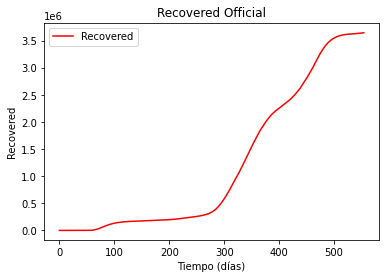

In [13]:
plt.plot(range(0, len(Ac_recovered_smooth)), Ac_recovered_smooth, 'r', label="Recovered")
plt.xlabel("Tiempo (días)")
plt.ylabel("Recovered")
plt.legend()

plt.title("Recovered Official")